<a href="https://colab.research.google.com/github/ji-min000/b06/blob/feature%2FML/%EC%A7%80%EC%9D%80)%20%EC%9B%94%EB%B3%84_%EC%A3%BC%EB%AC%B8%EA%B1%B4%EC%88%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
data = pd.read_csv( '/content/drive/MyDrive/01. 원본 테이블에서 날짜형식(yy-mm-dd)로 변환.csv' , encoding='windows-1252')
data.head()

,formatted_order_date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2020.1.1,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020.1.1,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020.1.1,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020.1.1,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020.1.1,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [ ]:
data['formatted_order_date'] = pd.to_datetime(data['formatted_order_date'])
data['month'] = data['formatted_order_date'].dt.month
data.head()

,formatted_order_date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,1
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,1
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,1
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,1
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,1


In [ ]:
data_month = data.groupby('month').agg({'Order ID': 'count'})
data_month.head(2)

,Order ID
month,
1,155
2,107


In [ ]:
data_month.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='month')

In [ ]:
dfX= pd.DataFrame(data_month['month'])
dfy = pd.DataFrame(data_month['Order ID'])

In [ ]:
data_month = pd.concat([dfX, dfy], axis=1)
data_month

,month,Order ID
0,1,155
1,2,107
2,3,238
3,4,203
4,5,242
5,6,245
6,7,226
7,8,218
8,9,459
9,10,298


In [ ]:
model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(dfX, dfy, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 323ms/step - loss: 88937.5391 - mse: 88937.5391
Epoch 2/300
1/1 [==============================] - 0s 12ms/step - loss: 6081.6328 - mse: 6081.6328
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 5255.7983 - mse: 5255.7983
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 5233.9956 - mse: 5233.9956
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 5220.1899 - mse: 5220.1899
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 5206.5815 - mse: 5206.5815
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 5193.0918 - mse: 5193.0918
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 5179.7183 - mse: 5179.7183
Epoch 9/300
1/1 [==============================] - 0s 10ms/step - loss: 5166.4604 - mse: 5166.4604
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 5153.3169 - mse: 5153.3169
Epoch 

In [ ]:
import numpy as np

input_data = np.array([1]).reshape(1, 1)

print(model.predict(input_data))

1/1 [==============================] - 0s 287ms/step
[[98.65762]]


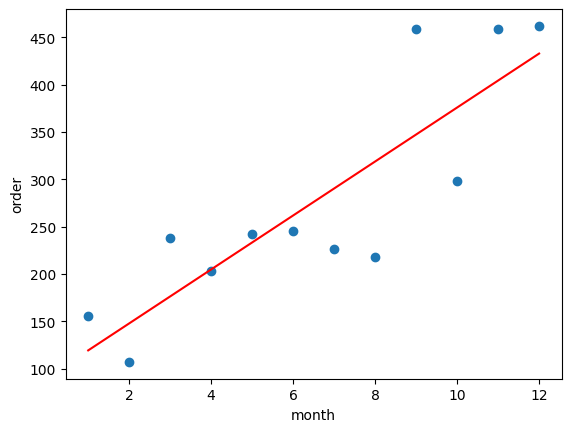

R^2: 0.7264193491461106


In [ ]:
from sklearn.linear_model import LinearRegression

# 데이터 프레임 생성
data_month = pd.concat([dfX, dfy], axis=1)

# 산점도 그리기
plt.scatter(dfX, dfy)
plt.xlabel("month")
plt.ylabel("order")

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(dfX, dfy)

# 예측값 계산
predicted_orders = model.predict(dfX)

# 선형 회귀선 그리기
plt.plot(dfX, predicted_orders, color="red")

# 그래프 출력
plt.show()

# 모델 평가
print("R^2:", model.score(dfX, dfy))



In [ ]:
# 각 요일의 예상 주문량 출력
for month, order in zip(data_month['month'], predicted_orders):
    print(f"{month}월의 예상 주문량: {order[0]:.0f}건")

1월의 예상 주문량: 119건
2월의 예상 주문량: 148건
3월의 예상 주문량: 176건
4월의 예상 주문량: 205건
5월의 예상 주문량: 233건
6월의 예상 주문량: 262건
7월의 예상 주문량: 290건
8월의 예상 주문량: 319건
9월의 예상 주문량: 347건
10월의 예상 주문량: 376건
11월의 예상 주문량: 404건
12월의 예상 주문량: 433건
